In [1]:
import numpy as np

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [46]:
train_dir = r'C:\Users\sejal\Downloads\train'
validation_dir = r'C:\Users\sejal\Downloads\validation'
test_dir =r'C:\Users\sejal\Downloads\test'

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [50]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [53]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [54]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

C:\Users\sejal\AppData\Local\Temp\ipykernel_19044\85649991.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 39s 354ms/step - loss: 0.6931 - acc: 0.5205 - val_loss: 0.6815 - val_acc: 0.5840
Epoch 2/20
100/100 [==============================] - 36s 357ms/step - loss: 0.6584 - acc: 0.6000 - val_loss: 0.6451 - val_acc: 0.6310
Epoch 3/20
100/100 [==============================] - 34s 340ms/step - loss: 0.6042 - acc: 0.6750 - val_loss: 0.6136 - val_acc: 0.6540
Epoch 4/20
100/100 [==============================] - 35s 349ms/step - loss: 0.5670 - acc: 0.7005 - val_loss: 0.6239 - val_acc: 0.6290
Epoch 5/20
100/100 [==============================] - 34s 344ms/step - loss: 0.5384 - acc: 0.7195 - val_loss: 0.5786 - val_acc: 0.6880
Epoch 6/20
100/100 [==============================] - 34s 342ms/step - loss: 0.5165 - acc: 0.7375 - val_loss: 0.5929 - val_acc: 0.6800
Epoch 7/20
100/100 [==============================] - 37s 370ms/step - loss: 0.4948 - acc: 0.7635 - val_loss: 0.5627 - val_acc: 0.7020
Epoch 8/20
100/100 [==============================] - 3

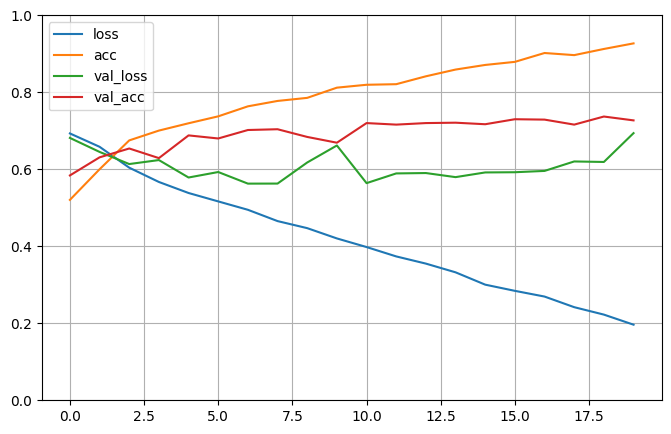

In [55]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [56]:
model.save("model.h5")

In [57]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

In [58]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [71]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch= 5,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5)

C:\Users\sejal\AppData\Local\Temp\ipykernel_19044\3587193255.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
5/5 [==============================] - 3s 526ms/step - loss: 0.6502 - acc: 0.5688 - val_loss: 0.5918 - val_acc: 0.7000
Epoch 2/100
5/5 [==============================] - 2s 475ms/step - loss: 0.6645 - acc: 0.6000 - val_loss: 0.6181 - val_acc: 0.6187
Epoch 3/100
5/5 [==============================] - 2s 451ms/step - loss: 0.6220 - acc: 0.6750 - val_loss: 0.6081 - val_acc: 0.6375
Epoch 4/100
5/5 [==============================] - 3s 533ms/step - loss: 0.6100 - acc: 0.6250 - val_loss: 0.6224 - val_acc: 0.6562
Epoch 5/100
5/5 [==============================] - 2s 475ms/step - loss: 0.6057 - acc: 0.6562 - val_loss: 0.6531 - val_acc: 0.5875
Epoch 6/100
5/5 [==============================] - 2s 465ms/step - loss: 0.6056 - acc: 0.7188 - val_loss: 0.7421 - val_acc: 0.5688
Epoch 7/100
5/5 [==============================] - 3s 505ms/step - loss: 0.6273 - acc: 0.6000 - val_loss: 0.6295 - val_acc: 0.6500
Epoch 8/100
5/5 [==============================] - 3s 500ms/step - loss: 0.6201 - a

In [72]:
model.save("project_cnn.h5")

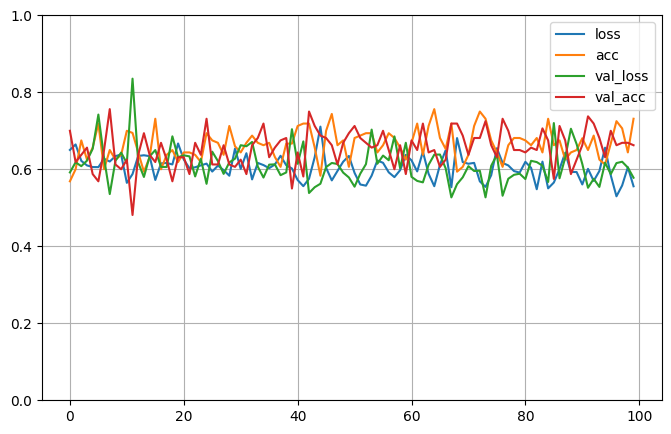

In [73]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [75]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 23s 0us/step


In [76]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [77]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [82]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [83]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [84]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb])

C:\Users\sejal\AppData\Local\Temp\ipykernel_19044\2272497544.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 564s 6s/step - loss: 0.4440 - acc: 0.7830 - val_loss: 0.2374 - val_acc: 0.9040
Epoch 2/30
100/100 [==============================] - 617s 6s/step - loss: 0.2637 - acc: 0.8895 - val_loss: 0.2248 - val_acc: 0.9190
Epoch 3/30
100/100 [==============================] - 620s 6s/step - loss: 0.2081 - acc: 0.9115 - val_loss: 0.1451 - val_acc: 0.9390
Epoch 4/30
100/100 [==============================] - 616s 6s/step - loss: 0.1692 - acc: 0.9325 - val_loss: 0.1903 - val_acc: 0.9330
Epoch 5/30
100/100 [==============================] - 610s 6s/step - loss: 0.1495 - acc: 0.9410 - val_loss: 0.1007 - val_acc: 0.9590
Epoch 6/30
100/100 [==============================] - 594s 6s/step - loss: 0.1231 - acc: 0.9480 - val_loss: 0.1547 - val_acc: 0.9450
Epoch 7/30
100/100 [==============================] - 529s 5s/step - loss: 0.0993 - acc: 0.9620 - val_loss: 0.1129 - val_acc: 0.9600
Epoch 8/30
100/100 [==============================] - 18988s 192s/ste

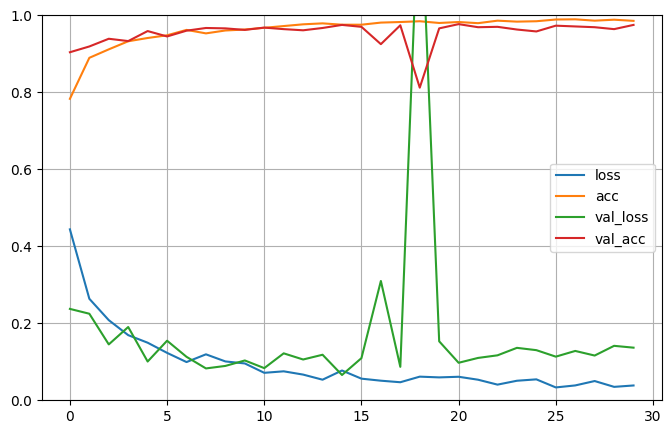

In [85]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [86]:
hist_df = pd.DataFrame(history.history) 

In [87]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [88]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model.evaluate_generator(test_generator, steps=50)